In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import *
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv('/content/drive/My Drive/2019-2/inteligencia/inteligenciaProyecto/rain2019.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13396 entries, 0 to 13395
Data columns (total 18 columns):
cod_est                13396 non-null object
FECHA                  13396 non-null object
T_Max                  13382 non-null float64
T_Med                  13382 non-null float64
T_Min                  13382 non-null float64
H_R_Max                13385 non-null float64
H_R_Med                13385 non-null float64
H_R_Min                13385 non-null float64
PromedioDeRadiacion    13388 non-null float64
SumaDeLluvia           13345 non-null float64
V_Max                  12850 non-null float64
V_Med                  12850 non-null float64
V_Min                  12657 non-null float64
SumaDeCV1              13386 non-null float64
SumaDeCV2              13386 non-null float64
SumaDeCV3              13386 non-null float64
SumaDeCV4              13386 non-null float64
PromedioDeDireccion    13396 non-null float64
dtypes: float64(16), object(2)
memory usage: 1.8+ MB


,cod_est,FECHA,T_Max,T_Med,T_Min,H_R_Max,H_R_Med,H_R_Min,PromedioDeRadiacion,SumaDeLluvia,V_Max,V_Med,V_Min,SumaDeCV1,SumaDeCV2,SumaDeCV3,SumaDeCV4,PromedioDeDireccion
0,AL001,2019-01-01T00:00:00,18.03,8.880042,2.370,94.9,69.756667,29.35,0.399086,0.0,16.20,3.021750,0.0,389.0,509.0,542.0,0.0,2.166667
1,AL001,2019-01-02T00:00:00,15.94,8.196292,1.488,96.2,83.562500,65.16,0.389498,0.0,18.00,3.448000,0.0,129.0,861.0,438.0,9.0,2.291667
2,AL001,2019-01-03T00:00:00,16.55,10.837417,6.040,92.7,74.906667,55.78,0.336150,0.0,20.70,6.000250,0.0,812.0,628.0,0.0,0.0,1.375000
3,AL001,2019-01-04T00:00:00,16.65,8.234125,3.135,95.4,81.607500,51.56,0.376608,0.0,11.70,1.950750,0.0,861.0,481.0,95.0,2.0,1.458333
4,AL001,2019-01-05T00:00:00,15.23,7.447917,1.825,93.1,80.821667,51.06,0.403922,0.0,17.55,3.652042,0.0,829.0,87.0,516.0,7.0,1.791667


In [3]:
print(type(df))
del df['cod_est']
del df['V_Min']
del df['SumaDeLluvia']
del df['SumaDeCV1']
del df['SumaDeCV2']
del df['SumaDeCV3']
del df['SumaDeCV4']
df['FECHA'] = pd.to_datetime(df['FECHA'])
df.set_index('FECHA', inplace=True)
df.dropna(inplace = True)

<class 'pandas.core.frame.DataFrame'>


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ad4b87cc0>,
      dtype=object)

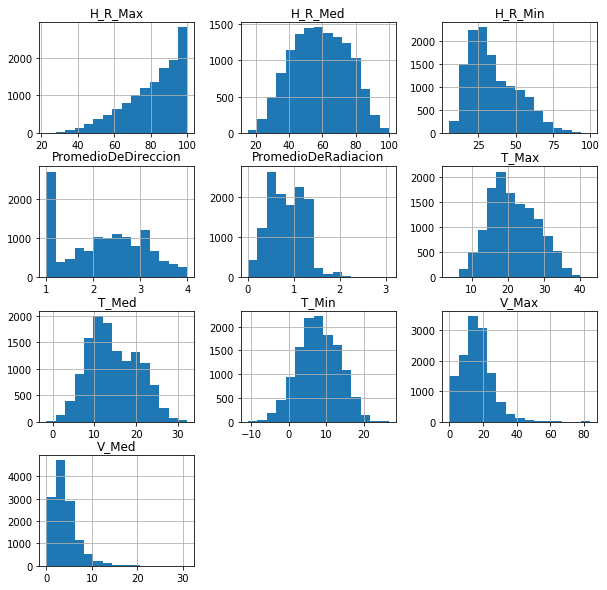

In [4]:
df.hist(bins=15, figsize=(10,10))

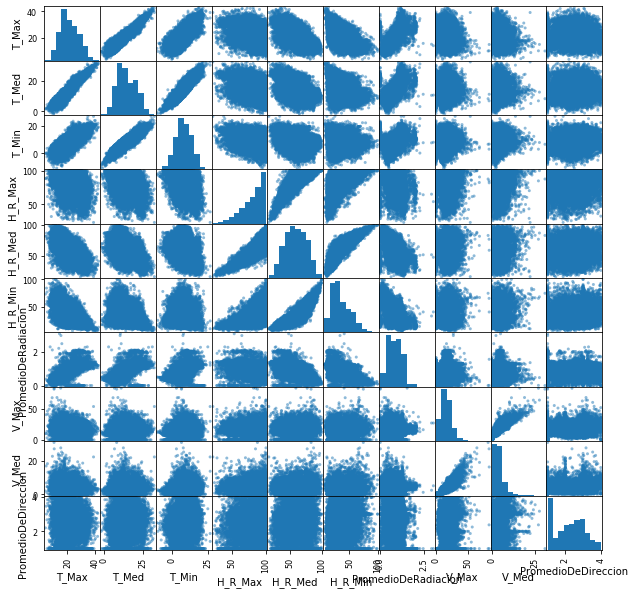

In [5]:
pd.plotting.scatter_matrix(df, figsize=(10,10));

In [6]:
df.head()

,T_Max,T_Med,T_Min,H_R_Max,H_R_Med,H_R_Min,PromedioDeRadiacion,V_Max,V_Med,PromedioDeDireccion
FECHA,,,,,,,,,,
2019-01-01,18.03,8.880042,2.370,94.9,69.756667,29.35,0.399086,16.20,3.021750,2.166667
2019-01-02,15.94,8.196292,1.488,96.2,83.562500,65.16,0.389498,18.00,3.448000,2.291667
2019-01-03,16.55,10.837417,6.040,92.7,74.906667,55.78,0.336150,20.70,6.000250,1.375000
2019-01-04,16.65,8.234125,3.135,95.4,81.607500,51.56,0.376608,11.70,1.950750,1.458333
2019-01-05,15.23,7.447917,1.825,93.1,80.821667,51.06,0.403922,17.55,3.652042,1.791667


In [7]:
val = np.random.permutation(df.values)
X = val[:,[0,1,2,3,4,5,6,8,9]]
y = val[:,6]
print(X.shape)
print(type(X))
print(y.shape)
print(type(y))


(12827, 9)
<class 'numpy.ndarray'>
(12827,)
<class 'numpy.ndarray'>


In [8]:
maximo = df.max(axis = 0 )
minimo = df.min(axis = 0)
print('Maximos de cada columna:\n',maximo)
print('\nMinimos de cada columna:\n',minimo)

Maximos de cada columna:
 T_Max                   42.800000
T_Med                   32.272083
T_Min                   26.700000
H_R_Max                100.000000
H_R_Med                100.000000
H_R_Min                100.000000
PromedioDeRadiacion      3.066300
V_Max                   83.900000
V_Med                   31.042083
PromedioDeDireccion      4.000000
dtype: float64

Minimos de cada columna:
 T_Max                   3.869000
T_Med                  -1.463458
T_Min                 -10.850000
H_R_Max                22.910000
H_R_Med                15.410417
H_R_Min                 5.636000
PromedioDeRadiacion     0.000000
V_Max                   0.000000
V_Med                   0.000000
PromedioDeDireccion     1.000000
dtype: float64


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)
X = X.astype('float32')#Lo pasamos a flotantes
y = y.astype('float32')

X_train = X_train.astype('float32')#Lo pasamos a flotantes
X_test = X_test.astype('float32')

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8978, 9) (8978,) (3849, 9) (3849,)


## 1. Con RF:


In [10]:
#Se aplica Random Forest
est_RF= RandomForestRegressor()
s = cross_val_score(est_RF, X, y, cv=KFold(20, shuffle=True), scoring=make_scorer(mean_squared_error))
print ("MSE %.6f (+/- %.5f)"%(np.mean(s), np.std(s)))

MSE 0.000028 (+/- 0.00008)


In [0]:
est_RF.fit(X_train, y_train)
predic_RF = est_RF.predict(X_test)

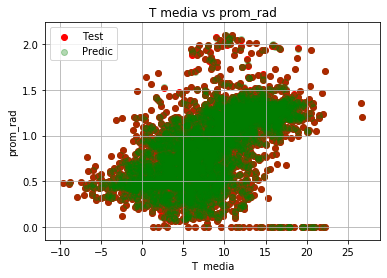

In [12]:
plt.scatter(X_test[:,2], y_test, color = "red")
plt.scatter(X_test[:,2], predic_RF, color = "green", alpha = .3)
plt.grid()
plt.legend(labels=['Test','Predic'])
plt.title("T media vs prom_rad")
plt.xlabel("T  media")
plt.ylabel("prom_rad")
plt.show()

## 2. Decision tree:

In [0]:
#Se aplica decision tree
est_DT = DecisionTreeRegressor()
s = cross_val_score(est_DT, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print("MSE %.6f (+/- %.5f)"%(np.mean(s), np.std(s)))

MSE 0.000052 (+/- 0.00009)


In [0]:
est_DT.fit(X_train, y_train)
predic_DT = est_DT.predict(X_test)

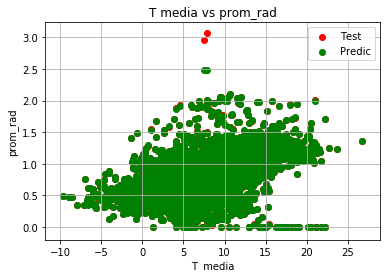

In [0]:
plt.scatter(X_test[:,2], y_test, color = "red")
plt.scatter(X_test[:,2], predic_DT, color = "green")
plt.grid()
plt.legend(labels=['Test','Predic'])
plt.title("T media vs prom_rad")
plt.xlabel("T  media")
plt.ylabel("prom_rad")
plt.show()

## 3. SVR

In [0]:
#Se aplica SVR
est_SV = SVR()
s = cross_val_score(est_SV, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print("MSE %.6f (+/- %.5f)"%(np.mean(s), np.std(s)))

MSE 0.024991 (+/- 0.00234)


In [0]:
est_SV.fit(X_train, y_train)
predic_SV = est_SV.predict(X_test)

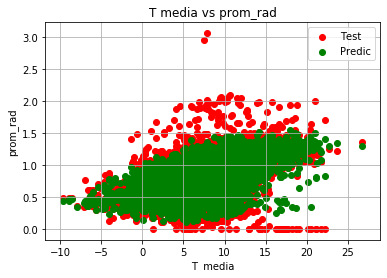

In [0]:
plt.scatter(X_test[:,2], y_test, color = "red")
plt.scatter(X_test[:,2], predic_SV, color = "green")
plt.title("T media vs prom_rad")
plt.grid()
plt.legend(labels=['Test','Predic'])
plt.xlabel("T  media")
plt.ylabel("prom_rad")
plt.show()

## 4. Deep learning:

In [0]:
X_train = X_train.reshape([-1, 9])#Agrega un indice que exige keras (-1)
X_test = X_test.reshape([-1, 9])


print('x_train shape:', X_train.shape)

x_train shape: (8978, 9)


In [0]:
model = keras.models.Sequential([ #keras de modelo secuencial, solo se definen las capas
    keras.layers.Flatten( input_shape=[9]),#Aplana las imagenes
    keras.layers.Dense(128, activation=tf.nn.relu),#capa escondida
    keras.layers.Dense(128, activation=tf.nn.relu),#capa escondida
    keras.layers.Dense(128, activation=tf.nn.relu),#capa escondida
    keras.layers.Dense(1, activation='linear')#Si se desea que sea regresion la ultima capa es una sola neurona y con activacion linear
])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 9)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1280      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 34,433
Trainable params: 34,433
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(), #Gradiente estocastico  
              loss='sparse_categorical_crossentropy',#Regla de minimizacion
              metrics=['mse'])#Mide el accuracy

In [0]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), verbose = 1)

Train on 8978 samples, validate on 3849 samples
Epoch 1/15
8978/8978 [==============================] - 1s 157us/sample - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 2/15
8978/8978 [==============================] - 1s 127us/sample - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 3/15
8978/8978 [==============================] - 1s 133us/sample - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 4/15
 544/8978 [>.............................] - ETA: 0s - loss: nan - mean_squared_error: nan

KeyboardInterrupt: ignored